# Variable Selection and Exploration

A reminder of the Research question from [this issue](https://github.com/alan-turing-institute/rds-course/issues/15):

> We want to investigate the contribution of material, occupational, and psychosocial factors on the self reported health (SRH) across different European countries. We will use SRH information collected by the Wave 2 and 3 of the EQLTS survey, aware that they offer only a partial representation of European populations and that SRH is per-se a highly subjective indicator, difficult to compare across countries.

Drawing from Christina's notebooks `Data_description` and `Handling_data`, we will use only the third wave data, `eql_2011.csv`. 


## Preliminary notes 

As mentioned in `Handling_data`, access the data by downloading the `csv` option from [here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7724#!/details). I will repeat some of the information Christina had so that we don't need to refer to two notebooks. 

You would have downloaded a folder with the following directory structure. Here I have only listed the files which we will use:

```
- UKDA-7724-csv
    - csv # here is the data
        - eqls_2011.csv
    - mrdoc #here is additional info
        - allissue #data dictionaries
        - excel
            - eqls_api_map.csv # description of what the column names mean
            - eqls_concordance_grid.xlxs #described which variables were included in which waves. and the mapping between waves
        - pdf # user guide
        - UKDA #study info
```

Create a folder `data` in the same root as this notebook. Copy the folder `UKDA-7724-csv` and its contents there. 

### Notes from the [User Guide](http://doc.ukdataservice.ac.uk/doc/7724/mrdoc/pdf/7724_eqls_2007-2011_user_guide_v2.pdf)

- In the data set there are 195 variables but some were not included in wave 3 - `eqls_concordance_grid.xlsx` states which. 
- Variables are grouped into primary and secondary topics. They are _also_ grouped into variable groupings. These differ slightly from the topics. The topics are an attempt to succinctly describe the semantic domain of each variable. The variable groupings are slightly overlapping with these topics (e.g Health crops up twice), but also includes indicators such as 'Derived Variables', which clearly is a technical grouping rather than a topic. 
- Derived variables "group numeric responses of other related variables or to collapse groupings of related categorical variables into fewer categories". The derived variables are potentially useful, since they aim to:
    - enhance the data quality by aggregating the responses into more usable and consistent format across both waves of the Survey
    - provide a clearer structure of datasets by reducing the number of variables
    - ensure confidentiality and anonymity of personal information and all respondents
- **Update**. The derived variables are not necessarily the most important questions, they simply occur when the are many related questions that can be aggregated.
    
### aside from Aldabe et al.

A quick recap on the paper. Aldabe et al., 2011 uses the following variables:
- Occupation and Education level for SES.
- Self-reported health.
- The main model was SES and age predicting SRH (age was included to control for it). 
- Additional models were tested that included a rather large list of _material_, _occupational_ and _psychosocial_ variables to test if they mediate the relationship. See Table 1 in the paper.
- The majority of responses were in "good" health (81.14% of men; 76.91% of woman). 


Since the derived variables were made specifically to make the dataset easier to use let's have a look at these derived variables and see how they map onto _material_, _occupational_, and _psychosocial_ factors.

In general, I am looking for predictors that are general (some of the questions are quite specific). There is nothing against adding to the list that I've produced.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_style("white")

In [2]:
datafolder = './data/UKDA-7724-csv/'
df11 = pd.read_csv(datafolder + 'csv/eqls_2011.csv')
df_map = pd.read_csv(datafolder + 'mrdoc/excel/eqls_api_map.csv', encoding='latin1')
df11 = df11.query('Y11_Country == 27')

In [3]:
# all topics
topics = df_map.TopicValue.unique()
topics = [t for t in topics if type(t)==str]
print(sorted(topics))

['Economics - Income, property and investment', 'Education - Higher and further', 'Education - general', 'Employment and labour - General', 'Employment and labour \x96 General', 'Environment, conservation and land use - Land use and planning', 'Geographies', 'Health - General', 'Health - Health services and medical ', 'Health - Specific diseases and medical conditions', 'Housing', 'Politics - Political behaviour and attitudes', 'Social stratification and groupings - Family life and marriage', 'Social stratification and groupings - General', 'Society and culture - Social attitudes and behaviour', 'Society and culture - Social indicators and quality of life', 'Transport']


In [4]:
# topics that the derived variables cover

dvs = df_map.query('VariableGroupValue == "Derived Variables"')
dvs[['VariableName','VariableLabel','TopicValue']].sort_values(by='TopicValue').head(n=len(dvs))

,VariableName,VariableLabel,TopicValue
138,Y11_Deprindex,Deprivation index: No. of items hhold can't af...,"Economics - Income, property and investment"
186,DV_Q7,DV: Total number of working hours,Employment and labour - General
193,DV_Q8,DV: Preferred working hours (3 groups),Employment and labour - General
194,DV_Q10,DV: Preferred working hours of respondent's pa...,Employment and labour - General
19,Y11_RuralUrban,DV: Rural/urban living,"Environment, conservation and land use - Land ..."
188,DV_Q43Q44,DV: Any limiting/not limiting chronic health p...,Health - Specific diseases and medical conditions
53,Y11_Accommproblems,No. of problems with accommodation,Housing
187,DV_Q67,DV: Citizenship,Social stratification and groupings - General
122,Y11_SocExIndex,Social Exclusion Index,Society and culture - Social attitudes and beh...
123,Y11_Volunteering,Volunteering frequency,Society and culture - Social attitudes and beh...


We only have a subset of topics covered by our derived variables. 

Notice that there is health in there. Any variable under health should be treated as a candidate dependent measure rather than a predictor. These should correlate with SRH, but in a trivial manner. If we were to include these in the model then we would be assessing a person's ability to monitor their own health, which is not the RQ. From the data map, self-reported health is `Y11_Q42`. The derived health value indicating chronic health problems is `DV_Q43Q44`. We can see for from the plots below that as the chronic health variable increases in severity self-reported health gets worse.

In [5]:
df11.rename(columns={"DV_Q43Q44": "ChronicHealth", "Y11_Q42": "SRH"}, inplace=True)

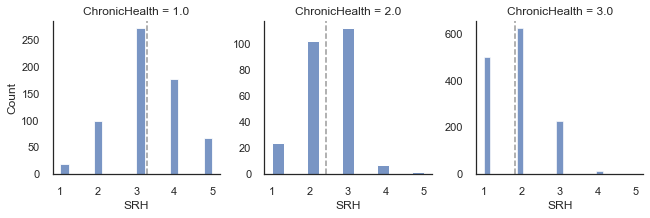

               ChronicHealth       SRH
ChronicHealth       1.000000 -0.607767
SRH                -0.607767  1.000000


In [6]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

g = sns.FacetGrid(df11, col="ChronicHealth", sharey=False)
g.map_dataframe(sns.histplot, 'SRH')

def plot_mean(data, **kws):
    mn = np.nanmean(data.SRH.values)
    ax = plt.gca()
    ax.axvline(mn, c = (.6,.6,.6), ls ='--')
    
g.map_dataframe(plot_mean)
g.set_axis_labels("SRH", "Count")
plt.show()

print(df11[['ChronicHealth','SRH']].corr(method='spearman'))

If we revisit the table above with some consideration we can sensibly group the derived variable topics as follows.

- Material
    - Economics - Income, property and investment
    - Environment, conservation and land use - Land ...
    - Housing
- Occupational
    - Employment and labour - General
- Psychosocial
    - Social stratification and groupings - General
    - Society and culture - Social attitudes and beh...
    
    
Let's have a closer look at these variables using `eqls_2011_ukda_data_dictionary.rtf`. I have also had a manual scan of `eqis_api_map` and included promising looking variables in the list below.



#### Material Variables
- `Y11_Deprindex`:  `Y11_Q59a` to `Y11_Q59f` ask the question 'Can house afford it if you want it?', with six examples (home heating, holiday, replacing goods, good food, new clothes, hosting friends). The responses are `1` (YES) or `2` (NO). The `Y11_Deprindex` is a count of the number of yes responses.
- `Y11_RuralUrban`:" This variable simply condenses a previous question from four categories into two - `1` (rural) or `2` (urban). Categorical. 
- `Y11_Accommproblems`: `Y11_Q19a` - `Y11_Q19f` asks a yes (1) or no (2) question about accomodation problems, with six examples. This variable is a count.
- `Y11_HHsize`: Household size including children (overlaps with social). Ranges from 1-4 where 4 is 4 or more.
- `Y11_Q32`: related to above, number of children. 5 = 5 or more.
- `Y11_Incomequartiles_percapita` ranges from 1 (1st quartile) to 4 (4th quartile). 
 
#### Occupational Variables
- `DV_Q7`: Count from a couple of working hours questions. Varies from 80-5. 
- `Y11_ISCEDsimple`: Education levels based on the International Standard Classification of Eductioan (ISCED). Ranges from 1-8. Confusing, 1-7 is from no to high education. 8 means N/A. 
- `Y11_Education`: related to above but less granular. 1-3 are primary -> tertiery. 4-6 are various catch answers. 

#### Pychosocial Variables
- `Y11_SocExIndex`: average score from four social exclusion question measures on a 5 scale response (1 = strongly disagree, 5 = strongly agree). 
- `Y11_MWIndex`: There is a set of five questions where the respondents state degree of agreeement, measures on a six-point scale. The mental wellbeing scale converts therse to a value betweem 0 - 100. 

So, this gives us **11 variables**, with two pairs that are variations of each other. This is enough to play with.
 
#### Other
- Age (5 categories). `Y11_Agecategory`
- Gender. `Y11_HH2a`
- Marital Status. `Y11_Q31`. 
- Country. `Y11_Country`. 

To make the manipulation easier we select a subset of the data with only the variables we want.


In [7]:
var_map = {"Y11_Q42": "SRH",
           'Y11_Deprindex': 'DeprIndex',
           "Y11_RuralUrban": "RuralUrban",
           "Y11_Accommproblems": 'AccomProblems',
           "Y11_HHsize": "HouseholdSize",
           "Y11_Q32": "Children",
           "Y11_Incomequartiles_percapita" : "IncomeQuartiles",
           "DV_Q7":"WorkingHours",
           "Y11_ISCEDsimple":"ISCED",
           "Y11_Education": "Education",
           "Y11_SocExIndex":"SocialExclusionIndex",
           "Y11_MWIndex": "MentalWellbeingIndex",
           "Y11_Agecategory":"AgeCategory",
           "Y11_HH2a":"Gender",
           "Y11_Q31":"MaritalStatus",
           "Y11_Country":"Country"
}

df11.rename(columns=var_map, inplace=True)
df11_set = df11[var_map.values()]
df11_set.head()

,SRH,DeprIndex,RuralUrban,AccomProblems,HouseholdSize,Children,IncomeQuartiles,WorkingHours,ISCED,Education,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country
36,2.0,2.0,2.0,2.0,3,0.0,2.0,NaN,2.0,1,2.50,72.0,1,1,4.0,27
37,3.0,NaN,2.0,4.0,3,0.0,NaN,NaN,3.0,2,2.75,64.0,2,1,4.0,27
38,3.0,5.0,2.0,2.0,4,2.0,3.0,NaN,6.0,3,4.25,36.0,3,1,1.0,27
39,2.0,0.0,2.0,0.0,4,0.0,NaN,NaN,6.0,3,1.75,56.0,1,2,4.0,27
40,3.0,0.0,2.0,1.0,4,3.0,3.0,NaN,6.0,3,2.00,92.0,2,1,1.0,27


<Figure size 2880x2880 with 0 Axes>

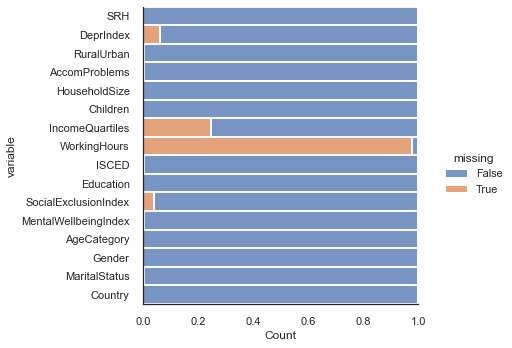

SRH                     0.000444
DeprIndex               0.062611
RuralUrban              0.005773
AccomProblems           0.004440
HouseholdSize           0.000000
Children                0.001776
IncomeQuartiles         0.247336
WorkingHours            0.977798
ISCED                   0.003996
Education               0.000000
SocialExclusionIndex    0.040853
MentalWellbeingIndex    0.004885
AgeCategory             0.000000
Gender                  0.000000
MaritalStatus           0.003108
Country                 0.000000
dtype: float64


In [8]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=df11_set.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25, 
)
plt.show()
# percentage of missing values and columns which have over 50% missingness
eqls_null_counts = df11_set.isnull().sum() / len(df11_set)
print(eqls_null_counts)

Working Hours is mostly missing. It is derived from two variables, `Y11_Q7`, `Y11_Q7b` (a secondary job). I guess that if the person does not have a second job then the total working hours is given as nan. 

In [9]:
df_hours = df11[['WorkingHours','Y11_Q7','Y11_Q7b']]

<Figure size 2880x2880 with 0 Axes>

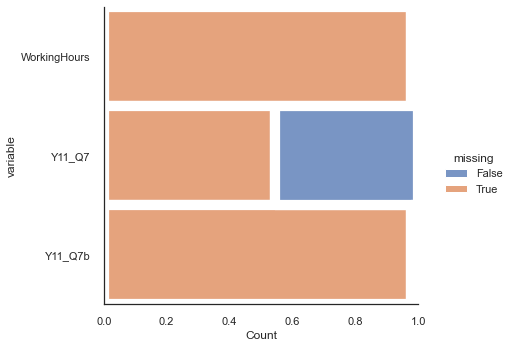

In [10]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=df_hours.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25, 
)
plt.show()

Hmmm, only about 40% of respondents filled out the working hours for the first job. Probably best to not use it. 

**TODO: Imputation, then later compare models**

Similarly, about 24% of people do not have an estimated `IncomeQuartiles`. Perhaps these are also unemployed? We could impute, but even sophisticated imputation methods (such as drawing from a distribution specified by the existing values) will introduce randomness (unwanted noise) into the relationships across variables. We could calculate the covariance matrix of the existing data and use that to impute. But similarly that will artificially enhance existing relationships and mean that you are more prone to overfitting. 

If I was a true researcher on this project I would try and uncover if there were any systemic reasons why some entries were missing. For example, is it the people that do not have jobs that don't have incomes? Or perhaps jobless respondants are classed as the first quartile income and it is something else? I would do this before any imputation methods are considered so that I could assess the extent to which my imputation method is distorting both the distribution of the `IncomeQuartiles` predictor _and_ the joint distribution of `IncomeQuartiles` and the other variables. 

As a sceptic of adding data just to make your regression work I would only select the data where `IncomeQuartiles` exists if I was to assess `IncomeQuartiles` as a variable.


Let's compare `IncomeQuartiles` to `DeprIndex`. They both speak to finances and `DeprIndex` could be used as a replacement.

From the below figure we can see that the distribution of `DeprIndex` shifts to the left as the income quartile increases, even though zero is the mode throughout. We have plotted it both ways round so better see the relationship. Though with such a small range of values a correlation is a little unreliable (and is pushed to lower values), we use spearman's rank correlation as a rough assessment of whether scoring higher on `IncomeQuartiles` means that one scores higher on the `DeprIndex`. You can see that the correlation `-.4`. This correlation will be dampened by the mode being zero on the `DeprIndex`. 


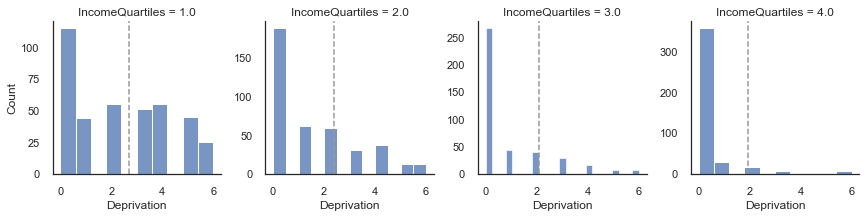

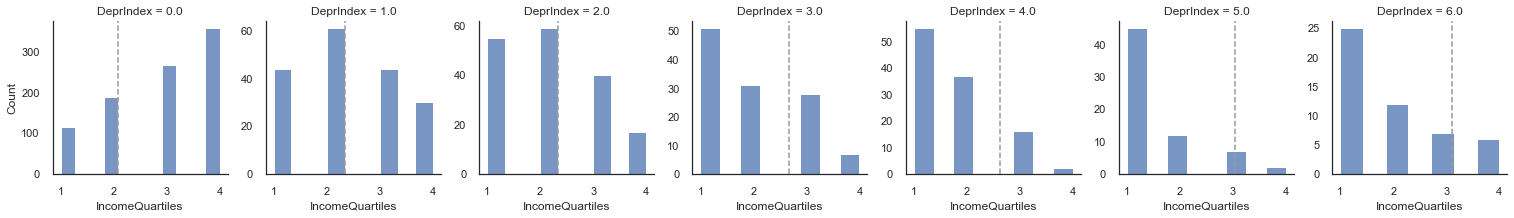

                 IncomeQuartiles  DeprIndex
IncomeQuartiles         1.000000  -0.441867
DeprIndex              -0.441867   1.000000


In [11]:
# TODO: When we switched to using the UK dataset the bins in the histplot below were WEIRD!

g = sns.FacetGrid(df11_set, col="IncomeQuartiles", sharey=False)
g.map_dataframe(sns.histplot, 'DeprIndex')

    
g.map_dataframe(plot_mean)
g.set_axis_labels("Deprivation", "Count")
plt.show()

g = sns.FacetGrid(df11_set, col="DeprIndex", sharey=False)
g.map_dataframe(sns.histplot, 'IncomeQuartiles')

    
g.map_dataframe(plot_mean)
g.set_axis_labels("IncomeQuartiles", "Count")
plt.show()

print(df11_set[['IncomeQuartiles','DeprIndex']].corr(method='spearman'))


There is a low amount of data missing in the other variables, with the highest being `DeprIndex` at 7.6%. If we were to only include rows with a full set of data I expect the amount of data removed to be a little higher, but given that we have 43636 total rows I don't think this is much of an issue.


In [12]:
pre_len = len(df11_set)
df11_model = df11_set.drop(columns=['WorkingHours','IncomeQuartiles']).dropna()
print(f"Number of Rows: {len(df11_model)}")
print(f"Percentage excluded: {((pre_len - len(df11_model)) / pre_len)*100}%")

Number of Rows: 1994
Percentage excluded: 11.456483126110124%


Let's have a look at the other variables.


First we have a broad look at the rank correlations. We take these with a pinch of salt because we haven't examined the distributions of the variables, and some of the variables are categorical rather than ordinal/numeric so the rank has little meaning (e.g. RuralUrban). 

Some initial observations on the below correlation matrix:

- Age correlates with a few variables. Especially SRH + Children
- Lots of variables correlate with SRH.
- DeprIndex, MentalWellbeing Index and Social Exclusion Index all correlate with one another.
- DeprIndex correlates with quite a few varialbes (SRH, AccomProblems, Education). 


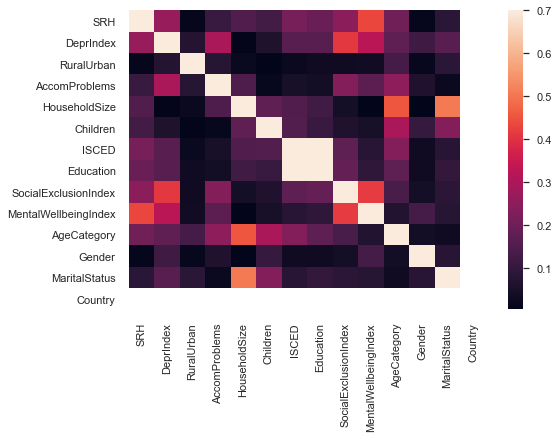

In [13]:
# to more easily to differences let's cap the correlation cmap
sns.heatmap(abs(df11_model.corr(method='spearman')), vmax = .7)
plt.show()

We know go through each loose grouping of _material_, _occupational_ and _psychosocial_ to assess the suitability of variables to include in our model.

Now let's examine the extent to which the _material_ variables are getting at similar things.

Some prelim thoughts:
    - You would expect that has `DeprIndex` goes up `AccomProblems` will also go up since the persons cannot afford to remedy accomodation issues.
    - `RuralUrban` only has two categories so doesn't lend itself to correlational analysis. Whether people are better off in the city or the country depends on many factors (and varies between country).
    - You would expect `HouseholdSize` and `Children` to be similar because `Children` counts towards household size (but `HouseholdSize` stops at >=4).

               DeprIndex  RuralUrban  AccomProblems  HouseholdSize  Children
DeprIndex       1.000000    0.069102       0.299058       0.007742  0.059301
RuralUrban      0.069102    1.000000       0.074515       0.024669  0.005691
AccomProblems   0.299058    0.074515       1.000000       0.147077 -0.015250
HouseholdSize   0.007742    0.024669       0.147077       1.000000  0.176445
Children        0.059301    0.005691      -0.015250       0.176445  1.000000


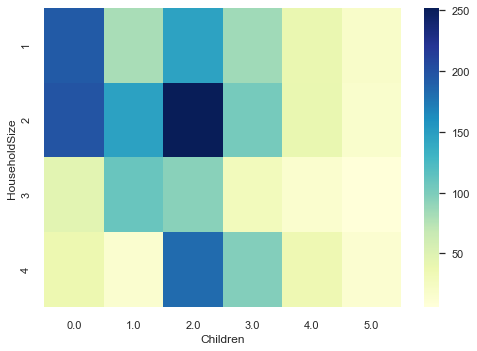

In [14]:
df_mat = df11_model[['DeprIndex','RuralUrban','AccomProblems','HouseholdSize','Children']]
print(df_mat.corr(method='spearman'))

df_mat=df_mat.groupby(by=['HouseholdSize','Children']).size().reset_index(name='counts')
df_mat = df_mat.pivot("HouseholdSize", "Children", "counts")

sns.heatmap(df_mat, cmap="YlGnBu")
plt.show()

`HouseholdSize` does not appear to monotonically increase with `Children`. Probably the mediation here is `Age`. One can live alone but have five children who each have their own households. 

AccomProblems    0.0    1.0   2.0   3.0  4.0  5.0  6.0
DeprIndex                                             
0.0            937.0  188.0  41.0  15.0  2.0  NaN  3.0
1.0            145.0   49.0  17.0   7.0  1.0  NaN  3.0
2.0            116.0   43.0  30.0   5.0  4.0  NaN  NaN
3.0             66.0   43.0  25.0   6.0  NaN  NaN  NaN
4.0             54.0   31.0  21.0   6.0  2.0  2.0  NaN
5.0             28.0   22.0  12.0   7.0  5.0  1.0  NaN
6.0             31.0   15.0   6.0   3.0  2.0  NaN  NaN


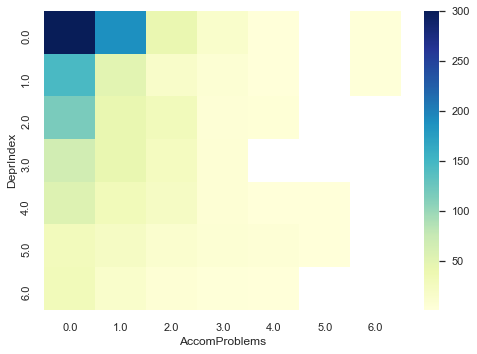

In [15]:
df_mat=df11_model[['DeprIndex','RuralUrban','AccomProblems','HouseholdSize','Children']].groupby(by=['DeprIndex','AccomProblems']).size().reset_index(name='counts')
df_mat = df_mat.pivot("DeprIndex", "AccomProblems", "counts")
print(df_mat)
# 0,0 will overwhelm the heatmap. Let's cap it.
sns.heatmap(df_mat, cmap="YlGnBu", vmax=300)
plt.show()

There is a bias for zero accommodation problems but as deprivation increases the amount of accommodation problems tends to increase.


One thing we haven't done so far is have a look at SRH. But before we do that let us reduce the dataset to the UK. This gives us 1994 entries.

In [16]:
df_uk = df11_model.query('Country == 27')
df_uk.describe()

,SRH,DeprIndex,RuralUrban,AccomProblems,HouseholdSize,Children,ISCED,Education,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000,1994.0
mean,2.258776,1.112839,1.533601,0.479940,2.247743,1.716650,4.052156,2.272818,2.311810,58.661986,3.527583,1.568706,1.89669,27.0
std,1.013821,1.674401,0.498995,0.875518,1.062430,1.306302,1.482897,0.557567,0.815467,22.050962,1.211457,0.495381,1.16495,0.0
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,27.0
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.750000,44.000000,3.000000,1.000000,1.00000,27.0
50%,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.250000,64.000000,4.000000,2.000000,1.00000,27.0
75%,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.000000,2.750000,76.000000,5.000000,2.000000,3.00000,27.0
max,5.000000,6.000000,2.000000,6.000000,4.000000,5.000000,8.000000,4.000000,5.000000,100.000000,5.000000,2.000000,4.00000,27.0


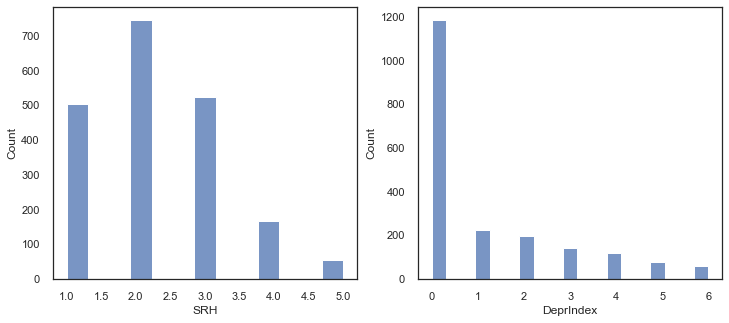

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df_uk, x='SRH', ax=axes[0])
sns.histplot(data=df_uk, x='DeprIndex', ax=axes[1])
plt.show()

You can see that in the UK dataset, as with the global dataset, most of `DeprIndex` responses were zero (right graph above). In the left panel we have SRH. The responses here are:
- 1: Very good
- 2: Good
- 3: Fair
- 4: Bad
- 5: Very Bad.  

The positive skew (i.e. the mean will be to the right of the median) shows that participants felt more healthy than unhealthy. 

Now, here we have an issue. As described in this [github comment](https://github.com/alan-turing-institute/rds-course/pull/48#issuecomment-904454223), the paper uses the 2003 EQLS dataset which has the answers of ["excellent”, “very good”, “good”, “fair”, “poor”]. The variable was dichotomised for ease of use with logistic regression as “good” health ["excellent", "very good", "good"] and “poor” health ["fair", "poor"]. 

Here we have different names of the responses. If we must dichotomise then the debate is around whether to categorise "fair" as good or bad health, since arguably the word semantically means good health rather than poor health. Let's follow the paper and have a 3-2 split with ("bad", "very bad") comprising the negative group.

**What we really should do is an [Ordinal Logistic Regression](https://en.wikipedia.org/wiki/Ordered_logit)**. But we will come to that later.